In [8]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import yfinance as yf

In [9]:
settings = {'figure.figsize':(14,4),
            'figure.dpi':144,
            'figure.facecolor':'w',
            'axes.spines.top':False,
            'axes.spines.bottom':False,
            'axes.spines.left':False,
            'axes.spines.right':False,
            'axes.grid':True,
            'grid.linestyle':'--',
            'grid.linewidth':0.5, 
            'figure.constrained_layout.use':True}
plt.rcParams.update(settings)

In [10]:
#### WHERE TO SAVE DATA'
output = "../output_mo_qt/"
figures = "../figures/"	

In [11]:
companies = ["^AEX", "ASML.AS", "AIR","ING", "WKL.AS", "STLA", "AD.AS", "PHG", "^FVX","^TNX", "^TYX", "^VIX"]

combined_Data = []
for i in companies:
    asml1 = yf.Ticker(i)
    hist = asml1.history(period="max")

    #align dates
    stck = pd.DataFrame(hist['Close'])
    stck['newDate'] = stck.index
    stck.index = stck['newDate'].dt.strftime('%Y-%m-%d')
    stck.drop(columns=['newDate'], inplace=True)
    stck.columns = [i]

    combined_Data.append(stck)


In [12]:
from functools import reduce
df_merged = reduce(lambda  left,right: pd.merge(left, right, left_index=True, right_index=True, how='outer'), combined_Data)
df_merged.index = pd.to_datetime(df_merged.index)
df_merged.tail()

,^AEX,ASML.AS,AIR,ING,WKL.AS,STLA,AD.AS,PHG,^FVX,^TNX,^TYX,^VIX
newDate,,,,,,,,,,,,
2024-12-04,891.630005,683.500000,70.279999,15.45,162.800003,12.73,32.82,26.280001,4.062,4.180,4.347,13.45
2024-12-05,894.400024,679.200012,68.449997,15.94,164.250000,13.24,33.25,26.240000,4.076,4.180,4.336,13.54
2024-12-06,891.669983,677.599976,67.629997,15.83,162.800003,13.65,32.50,26.209999,4.034,4.151,4.331,12.77
2024-12-09,894.719971,NaN,65.959999,15.88,NaN,13.73,NaN,26.280001,4.072,4.199,4.390,14.19
2024-12-10,894.119995,675.500000,NaN,NaN,161.550003,NaN,32.07,NaN,NaN,NaN,NaN,14.15


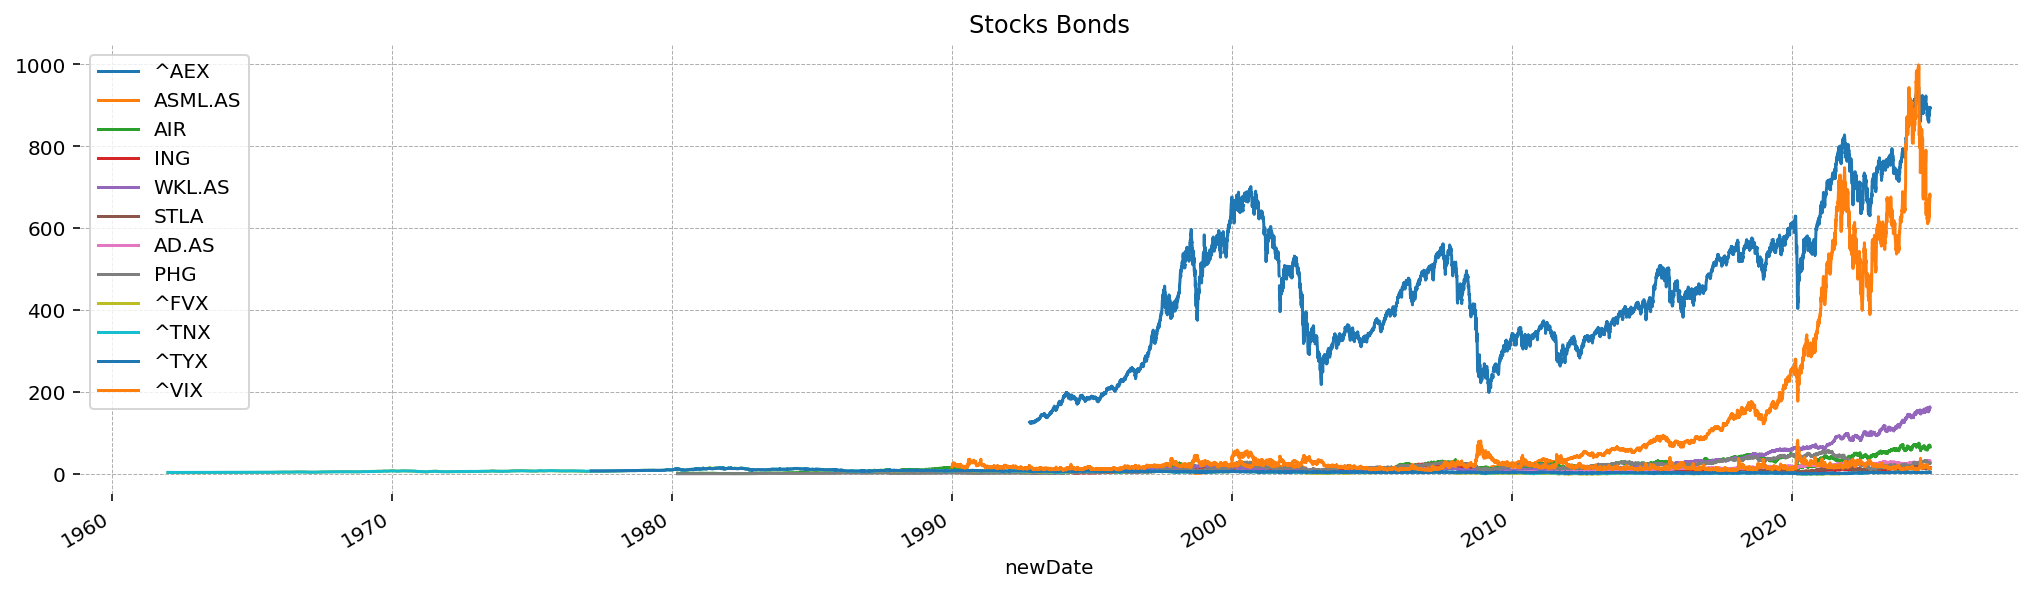

In [13]:

df_merged.plot(title='Stocks Bonds', grid=True);

In [14]:
aex_monthly = df_merged.resample('1MS').mean()
aex_monthly = aex_monthly.loc["1995-01-01":,]

aex_monthly.to_csv(output + "aex_stocks_bonds_mo.csv")